## PROYECTO 

In [2]:
#echo "# proyecto_1" >> README.md
#git init
#git add README.md
#git commit -m "first commit"
#git branch -M main
#git remote add origin https://github.com/jrspm/proyecto_1.git
#git push -u origin main

#git remote add origin https://github.com/jrspm/proyecto_1.git
#git branch -M main
#git push -u origin main



#usar para actualizar el proyecto
#git commit -m "nombre_actualizacion"
#git push -u origin main




In [3]:
#------------------------------------- inicio paquetes necesarios -------------------------------------

import numpy as np # paquete para arrays

import pandas as pd # paquete para dataframes

import random # se uso este paquete porue se queria que los valores para reducir el porcentaje fuera aleatorio

import seaborn as sns

import matplotlib.pyplot as plt

#------------------------------------- fin paquetes necesarios -------------------------------------

### PASO 2

In [4]:

######################################################################################################
################################################ PASO 2 ##############################################
# Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación
# y pruebas(20 %).
######################################################################################################

#-------------------------------------  inicio data frame cargar datos -------------------------------------

#cargar datos con el nombre del archivo y el numero de columnas, tambien puede reducir en un porcentaje 

class Datos_Proyecto:

    def __init__(self, nombre_archivo,lista_columnas): # todos los atributos del objeto

        self.array_total=np.load(nombre_archivo) #cargar el archivo usando el nombre, debe estar en la carpeta y deber ser un array

        self.lista_columnas_1=lista_columnas #lista del nombre de las columnas de array

        rows, columns = self.array_total.shape #obtener cantidad de filas, columnas del array

        self.cantidad_filas=rows #cantidad de filas del array

        self.array_tolist=self.array_total.tolist() # convertir en lista el array para poder usarlo en pandas

        self.dataframe_total=pd.DataFrame(self.array_tolist, columns=self.lista_columnas_1) # crear el dataframe y nombrar las columnas

        self.data_Reducido_trabajar=self.dataframe_total

        self.data_Reducido_comparar=self.dataframe_total




    def reducir_data(self,porcentaje_reducir): #metodo para reducir el dataframe, porcentaje a reducir

        lista_reducir=[]

        if porcentaje_reducir<1 and porcentaje_reducir>0: # condicionante para reducir

            cantidad_filas_porcentaje=int((self.cantidad_filas)*porcentaje_reducir) #cantidad de filas del porcentaje a reducir


            while len(lista_reducir)<cantidad_filas_porcentaje: # terminar el proceso hasta que se tengan todos los valores de la lista

                valor_random=random.randint(0,self.cantidad_filas-1) # seleccionar un valor random, entre 0 y la cantidad de datos

                if lista_reducir.count(valor_random)==0: # comparar que no exista el valor random
                
                    lista_reducir.append(valor_random) #agregar a la lista el valor random
            
            
            lista_reducir.sort() # ordenar la lista a reducir

            set_range_cantida_filas=set(list(range(self.cantidad_filas-1))) # conjunto de todas las filas dataframe

            lista_reducida_trabajar=list(set_range_cantida_filas.difference(set(lista_reducir))) #diferencia de conjuntos, lista de los valores a trabajar

            self.data_Reducido_trabajar=self.dataframe_total.drop(lista_reducir, axis=0) #dataframe de las filas que se trabajaran

            self.data_Reducido_comparar=self.dataframe_total.drop(lista_reducida_trabajar, axis=0) #dataframe de las filas que se compararan

            return self.data_Reducido_trabajar, self.data_Reducido_comparar

        else:

            print("Valor incorrecto")


    def valor_max_med_min_ptp_desv(self,list_num_int,redondear): #metodo para obtener los valores max_min_medio_ptp_desvi, ingresar 

        dic_val_max_med_min_ptp_desv={"VALORES":("MAXIMO","MEDIA","MINIMO","PEAK TO PEAK","DESVIACION")}

        for i in self.lista_columnas_1:

            data_1=self.data_Reducido_trabajar[i] #DATAFRAME DE CADA COLUMNA i 

            val_max=data_1.max() # obtener el valor maximo del dataframe
            val_med=data_1.mean() # obtener el valor medio del dataframe
            val_min=data_1.min() # obtener el valor minimo del dataframe 
            val_des=data_1.dropna().std() # obtener la desviacion estandar quitando los nan
            val_ptp=np.ptp(data_1.dropna()) # obtener el peak to peak quitando los nan

            val_cancatenados=[val_max,val_med,val_min,val_ptp,val_des] # hacer una lista de los valores

            if list_num_int.count(i)>0: #comparar si una de las columnas esta en el listado de enteros

                val_cancatenados = list(map(int, val_cancatenados)) # redondear enteros cuando la columna lo requiera

            else:

                val_cancatenados =[round(i,redondear) for i in val_cancatenados] # redondear hasta la cifra indicada


            val_cancatenados_1=tuple(val_cancatenados) # convertir en tupla la lista

            dic_val_max_med_min_ptp_desv[i]=val_cancatenados_1 # guardar en el diccionario la tupla con los valores segun la columna

        data_valores = pd.DataFrame(dic_val_max_med_min_ptp_desv) # crear un dataframe apartir de un diccionario
            
        return data_valores #regresa un dataframe con todos los valores

    def histograma_parejas(self,list_graf): #metodo para obtener los valores max_min_medio_ptp_desvi, ingresar 

        for i in list_graf:

            #------- inicio comprobar distribucion --------------------

            #self.data_Reducido_trabajar.sort_values(i[1])

            #data_1=self.data_Reducido_trabajar[i].dropna() #DATAFRAME DE CADA COLUMNA i

            #data_1=data_1.value_counts() #para contar la catidad de valores que hay de un mismo valor 

            #data_1_dic=data_1.to_dict()

            #keys = data_1_dic.keys()
            #sorted_keys = sorted(keys)

            #data_2_dic = {key:data_1_dic[key] for key in sorted_keys}

            #print(data_2_dic)

            #------- fin comprobar distribucion --------------------              

            #------- inicio forma 1 ------------

            #self.data_Reducido_trabajar[i].dropna().hist()

            #plt.show()

            #------- fin forma 1 ------------

            #------- inicio forma 2 ------------

            #data_1=self.data_Reducido_trabajar[i].dropna() #DATAFRAME DE CADA COLUMNA i
       
            #res = pd.Series(data_1,name="Range")

            #plot = sns.distplot(res,rug=False,hist=True)
            
            #plt.show()

            #------- fin forma 2 ------------

            #------- inicio forma 3 ------------

            try:

                data_1=self.data_Reducido_trabajar[i].dropna().values.tolist() #DATAFRAME DE CADA COLUMNA i    

                df = pd.DataFrame(data_1, columns=[i]) # nombrar a la columna 

                plot = sns.displot(data = df, x=i )

                plt.title("")
                plt.xticks(fontsize=9, rotation=45)
                plt.xlabel(i,fontsize=12)
                plt.ylabel('Counted',fontsize=12)
                plt.tight_layout()
                
            except:
                print("ERROR AL GENERAR LA GRAFICA DE LOS HISTOGRAMAS")
                pass

            #------- fin forma 3 ------------

        plt.show()

    def factor_correlacion(self,lista_graf_2):

        list_corr=[]

        cont_1=0

        lista_columns_2=[]

        try:

            for i in lista_graf_2:

                cont_1+=1

                data_1=self.data_Reducido_trabajar[[i[1],i[0]]].dropna()

                corr_1=data_1.corr().values.tolist()

                key=i[1]+" VS "+i[0]

                corr_value=round(corr_1[0][1],4)

                lista_columns_2.append(key)

                list_corr.append(corr_value)

                array_data_1=data_1.values.tolist()

                array2=np.reshape(array_data_1,-1)

                lista_x=array2[0:-1:2]

                lista_y=array2[1::2]          


                plt.scatter(lista_x,lista_y)
                plt.title(f"{key} ---- Corr:{corr_value}", fontsize = 12)
                plt.xticks(fontsize=9, rotation=45)
                plt.xlabel(i[1],fontsize=12)
                plt.ylabel(i[0],fontsize=12)
                plt.tight_layout()
                plt.show()


            data_valores_corr = pd.DataFrame(list_corr, index=lista_columns_2, columns=["CORRELATIVO"])

            return data_valores_corr

        except: 
            print("Error al generar las graficas de las correlaciones")
            pass




#-------------------------------------  fin data frame cargar datos -------------------------------------

INGRESAR DATOS Y NOMBRAR LAS COLUMNAS

In [5]:
lista_1=["PRECIO",
    "CALIDAD_MATERIAL",
    "AREA_PISO",
    "TOTAL_HABITACIONES",
    "AÑO_CONSTRUCCION",
    "FRENTE"] # LISTA DE LOS NOMBRES DE LAS COLUMNAS

datos_1=Datos_Proyecto("proyecto_training_data.npy",lista_1) # leer los datos


DATAFRAME DE TODOS LOS DATOS 

In [6]:
print(datos_1.dataframe_total) # DATAFRAME DE TODOS LOS DATOS 

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0     208500.0               7.0      856.0                 8.0   
1     181500.0               6.0     1262.0                 6.0   
2     223500.0               7.0      920.0                 6.0   
3     140000.0               7.0      961.0                 7.0   
4     250000.0               8.0     1145.0                 9.0   
...        ...               ...        ...                 ...   
1455  175000.0               6.0      953.0                 7.0   
1456  210000.0               6.0     2073.0                 7.0   
1457  266500.0               7.0     1188.0                 9.0   
1458  142125.0               5.0     1078.0                 5.0   
1459  147500.0               5.0     1256.0                 6.0   

      AÑO_CONSTRUCCION  FRENTE  
0               2003.0    65.0  
1               1976.0    80.0  
2               2001.0    68.0  
3               1915.0    60.0  
4               2000.0    84.0

DATAFRAME  entrenamiento(80 %)

In [7]:
data_Reducido_from_datos_1=datos_1.reducir_data(0.2) # reducir los datos en el 20%
print(data_Reducido_from_datos_1[0]) # DATAFRAME  entrenamiento(80 %)

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0     208500.0               7.0      856.0                 8.0   
1     181500.0               6.0     1262.0                 6.0   
2     223500.0               7.0      920.0                 6.0   
3     140000.0               7.0      961.0                 7.0   
4     250000.0               8.0     1145.0                 9.0   
...        ...               ...        ...                 ...   
1455  175000.0               6.0      953.0                 7.0   
1456  210000.0               6.0     2073.0                 7.0   
1457  266500.0               7.0     1188.0                 9.0   
1458  142125.0               5.0     1078.0                 5.0   
1459  147500.0               5.0     1256.0                 6.0   

      AÑO_CONSTRUCCION  FRENTE  
0               2003.0    65.0  
1               1976.0    80.0  
2               2001.0    68.0  
3               1915.0    60.0  
4               2000.0    84.0

DATAFRAME pruebas(20 %)

In [8]:
print(data_Reducido_from_datos_1[1]) # DATAFRAME pruebas(20 %)

        PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
5     143000.0               5.0      796.0                 5.0   
8     129900.0               7.0     1022.0                 8.0   
18    159000.0               5.0     1114.0                 6.0   
23    129900.0               5.0     1060.0                 6.0   
29     68500.0               4.0      520.0                 4.0   
...        ...               ...        ...                 ...   
1445  129000.0               6.0      913.0                 6.0   
1450  136000.0               5.0      896.0                 8.0   
1451  287090.0               8.0     1578.0                 7.0   
1453   84500.0               5.0     1140.0                 6.0   
1459  147500.0               5.0     1256.0                 6.0   

      AÑO_CONSTRUCCION  FRENTE  
5               1993.0    85.0  
8               1931.0    51.0  
18              2004.0    66.0  
23              1976.0    44.0  
29              1927.0    60.0

### PASO 3

In [9]:

#------------------------------------- inicio max_min_medio_ptp_desvi -------------------------------------

lista_enteros=["AÑO_CONSTRUCCION"] # columnas que deben ser enteros


#ingresar los valores de la lista de las columnas que deben ser enteros y el valor de los decimales
data_valores=datos_1.valor_max_med_min_ptp_desv(lista_enteros,4) #obtener la media de cada columna en un diccionario

#------------------------------------- fin  max_min_medio_ptp_desvi ------------------------------------------

print(data_valores)


        VALORES       PRECIO  CALIDAD_MATERIAL  AREA_PISO  TOTAL_HABITACIONES  \
0        MAXIMO  755000.0000           10.0000  4692.0000             12.0000   
1         MEDIA  180904.6293            6.1104  1172.4777              6.5411   
2        MINIMO   34900.0000            1.0000   334.0000              2.0000   
3  PEAK TO PEAK  720100.0000            9.0000  4358.0000             10.0000   
4    DESVIACION   79710.9926            1.3813   394.9648              1.6398   

   AÑO_CONSTRUCCION    FRENTE  
0              2009  313.0000  
1              1971   69.9791  
2              1872   21.0000  
3               137  292.0000  
4                30   24.9501  


### PASO 4

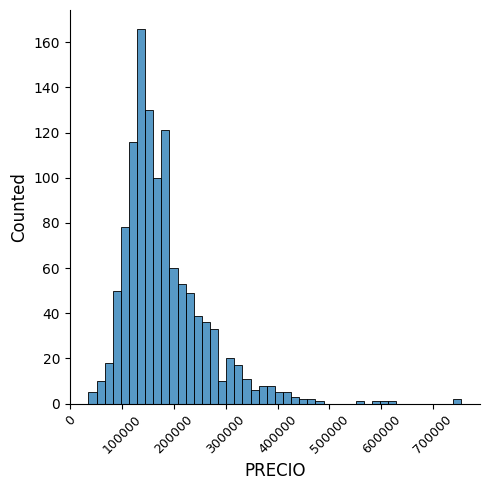

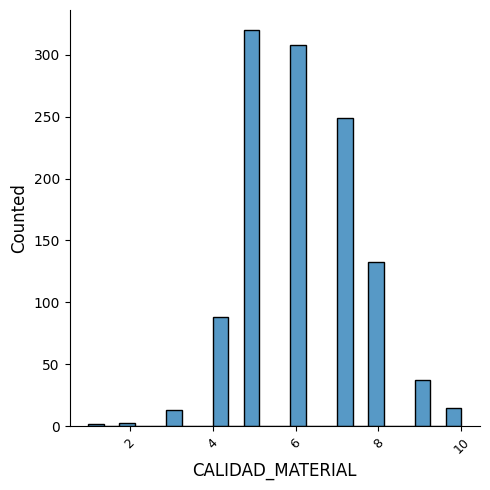

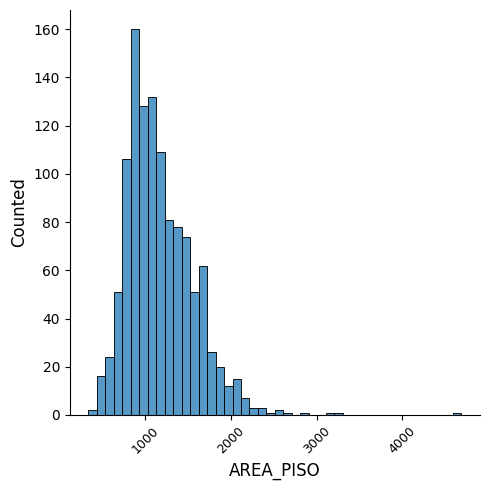

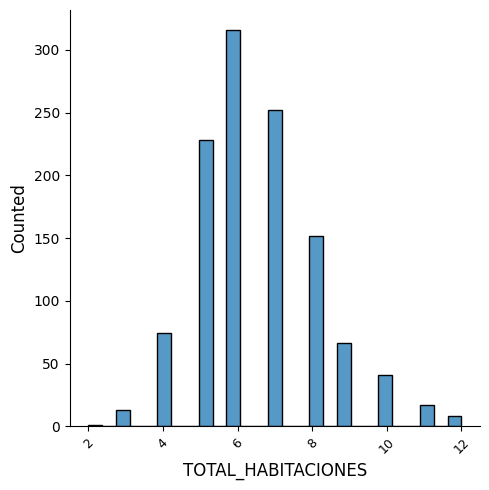

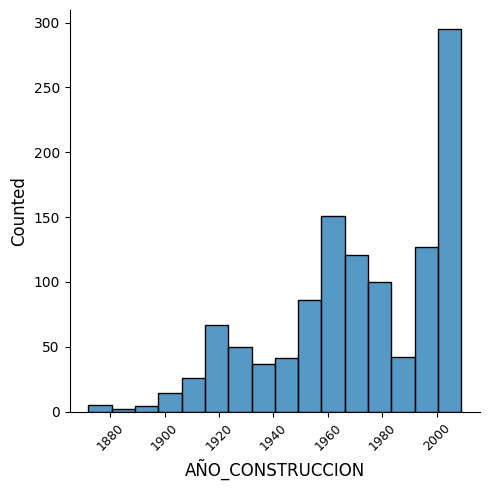

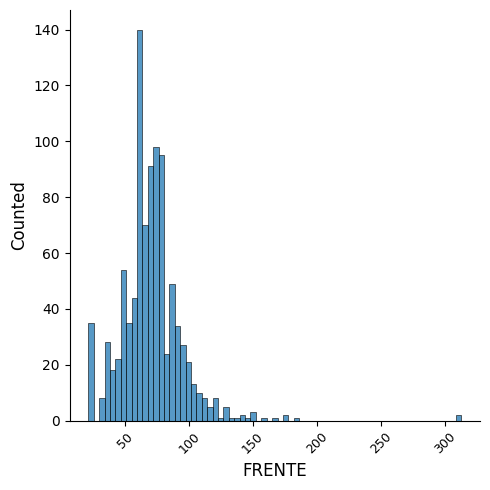

In [10]:
#------------------------------------- inicio imprimir histogramas -------------------------------------

#ingresar el listado de las parejas de las columnas que se desean graficar [[y1,x1],[y2,x2]]

lista_of_columns=["PRECIO","CALIDAD_MATERIAL","AREA_PISO","TOTAL_HABITACIONES","AÑO_CONSTRUCCION","FRENTE"]

datos_1.histograma_parejas(lista_of_columns)

#------------------------------------- fin imprimir histogramas------------------------------------------


### PASO 5

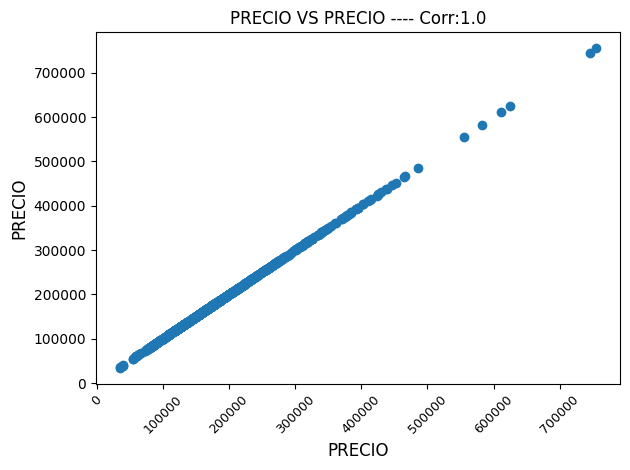

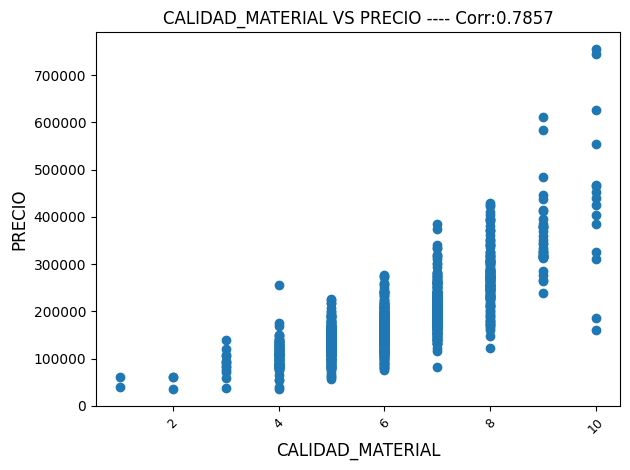

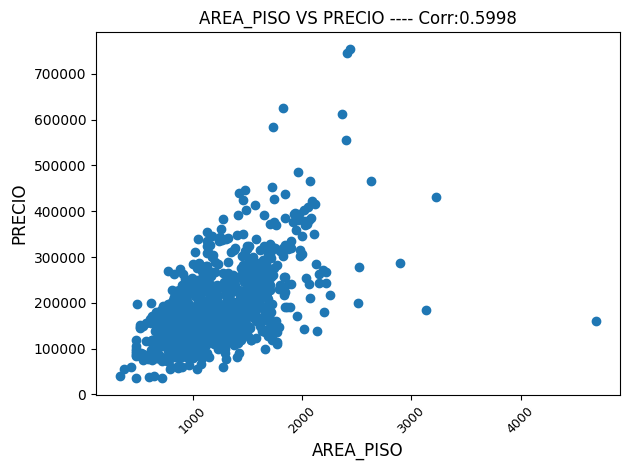

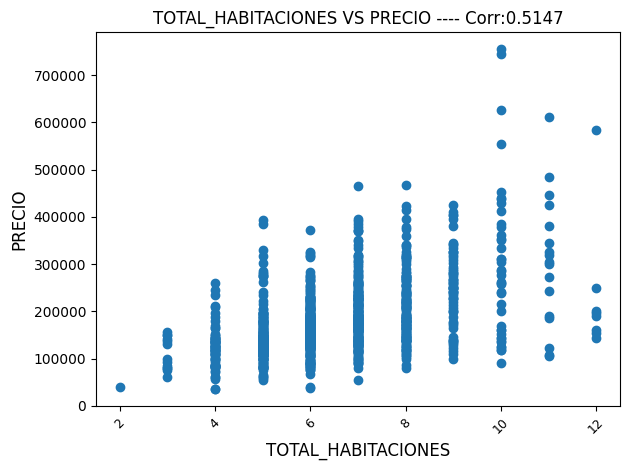

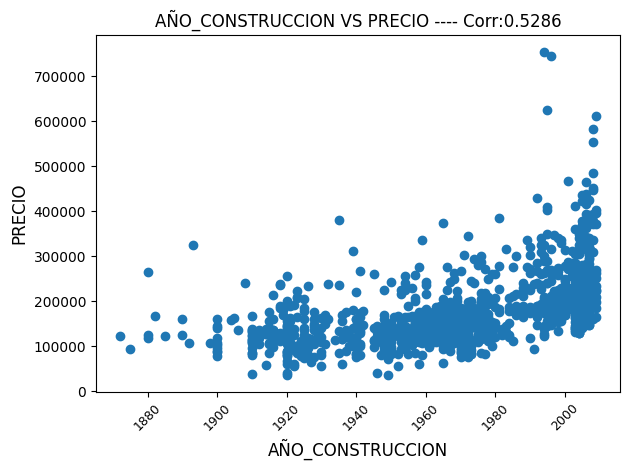

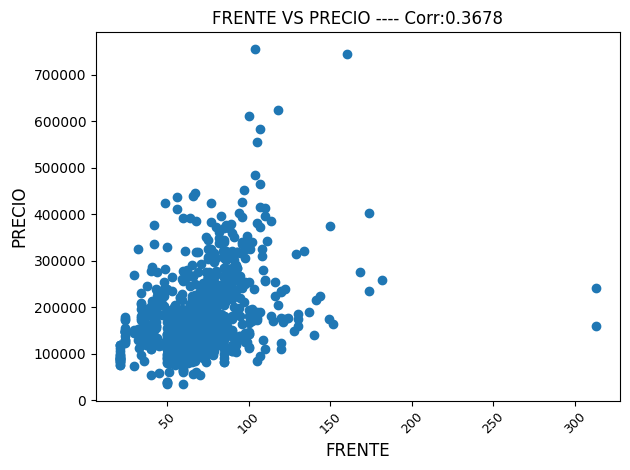

                              CORRELATIVO
PRECIO VS PRECIO                   1.0000
CALIDAD_MATERIAL VS PRECIO         0.7857
AREA_PISO VS PRECIO                0.5998
TOTAL_HABITACIONES VS PRECIO       0.5147
AÑO_CONSTRUCCION VS PRECIO         0.5286
FRENTE VS PRECIO                   0.3678


In [11]:
lista_graf_2=[["PRECIO","PRECIO"],
    ["PRECIO","CALIDAD_MATERIAL"],
    ["PRECIO","AREA_PISO"],
    ["PRECIO","TOTAL_HABITACIONES"],
    ["PRECIO","AÑO_CONSTRUCCION"],
    ["PRECIO","FRENTE"]] 


data_valores_corr=datos_1.factor_correlacion(lista_graf_2)

print(data_valores_corr)

